In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import json
import re 
import time
from pandas.io.json import json_normalize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
#open files

champId = open("C:/Users/Aaron/Desktop/loldfs/champDic.pkl", "rb")
o2df = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/objective2_matches.csv")
champIndex = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/champion_index.csv")
#ob1_w = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/objective1_winner_data.csv")
#ob1_l = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/objective1_loser_data.csv")

In [3]:
champId = pickle.load(champId)
champId = {k:v.strip() for k, v in champId.items()}
champId

{'266': 'Aatrox',
 '103': 'Ahri',
 '84': 'Akali',
 '166': 'Akshan',
 '12': 'Alistar',
 '32': 'Amumu',
 '34': 'Anivia',
 '1': 'Annie',
 '523': 'Aphelios',
 '22': 'Ashe',
 '136': 'Aurelion Sol',
 '268': 'Azir',
 '432': 'Bard',
 '53': 'Blitzcrank',
 '63': 'Brand',
 '201': 'Braum',
 '51': 'Caitlyn',
 '164': 'Camille',
 '69': 'Cassiopeia',
 '31': "Cho'Gath",
 '42': 'Corki',
 '122': 'Darius',
 '131': 'Diana',
 '119': 'Draven',
 '36': 'Dr. Mundo',
 '245': 'Ekko',
 '60': 'Elise',
 '28': 'Evelynn',
 '81': 'Ezreal',
 '9': 'Fiddlesticks',
 '114': 'Fiora',
 '105': 'Fizz',
 '3': 'Galio',
 '41': 'Gangplank',
 '86': 'Garen',
 '150': 'Gnar',
 '79': 'Gragas',
 '104': 'Graves',
 '887': 'Gwen',
 '120': 'Hecarim',
 '74': 'Heimerdinger',
 '420': 'Illaoi',
 '39': 'Irelia',
 '427': 'Ivern',
 '40': 'Janna',
 '59': 'Jarvan IV',
 '24': 'Jax',
 '126': 'Jayce',
 '202': 'Jhin',
 '222': 'Jinx',
 '145': "Kai'Sa",
 '429': 'Kalista',
 '43': 'Karma',
 '30': 'Karthus',
 '38': 'Kassadin',
 '55': 'Katarina',
 '10': 'Kayle

In [4]:
o2df.info()
o2df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185714 entries, 0 to 185713
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   win     185714 non-null  int64
 1   p1      185714 non-null  int64
 2   p2      185714 non-null  int64
 3   p3      185714 non-null  int64
 4   p4      185714 non-null  int64
 5   p5      185714 non-null  int64
 6   gameId  185714 non-null  int64
 7   team    185714 non-null  int64
dtypes: int64(8)
memory usage: 11.3 MB


,win,p1,p2,p3,p4,p5,gameId,team
0,0,7,350,266,517,110,4247263043,100
1,1,236,245,350,110,57,4247155821,100
2,0,235,60,223,112,58,4243963257,100
3,0,111,142,236,78,98,4241678498,100
4,1,145,875,236,34,60,4241538868,100


In [5]:
champIndex.info()
champIndex.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Champ   156 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


,Champ
0,Aatrox
1,Ahri
2,Akali
3,Akshan
4,Alistar


In [6]:
'''
ob1_l["win"].fillna("Fail", inplace = True)
ob1_l["gameId"] = ob1_l["gameId"].map(int)
ob1_l.info()
ob1_l.head()
'''

'\nob1_l["win"].fillna("Fail", inplace = True)\nob1_l["gameId"] = ob1_l["gameId"].map(int)\nob1_l.info()\nob1_l.head()\n'

In [7]:
'''
ob1_w["gameId"] = ob1_w["gameId"].map(int)
ob1_w.info()
ob1_w.head()
'''

'\nob1_w["gameId"] = ob1_w["gameId"].map(int)\nob1_w.info()\nob1_w.head()\n'

In [8]:
#One Hot Encoding the dataframe

#delete the unknown rows
o2df = o2df[o2df.win != "Unknown"]

#separating win column with the rest
winDf = o2df["win"]
o2Dff = o2df.drop(["win"], axis = 1)

#delete columns that have missing champions //which were 0//
o2Dff = o2Dff[o2Dff.p1 != 0]
o2Dff = o2Dff[o2Dff.p2 != 0]
o2Dff = o2Dff[o2Dff.p3 != 0]
o2Dff = o2Dff[o2Dff.p4 != 0]
o2Dff = o2Dff[o2Dff.p5 != 0]

#convert the str keys into integers
strId = {int(k):str(v) for k,v in champId.items()}

#replace the names, then join them
o2Names = o2Dff.replace(strId)
o2Names = pd.concat([winDf, o2Names], axis = 1)
#drop the null values
o2Names = o2Names.dropna()
o2Names.reset_index()
o2Names["gameId"] = o2Names["gameId"].map(int)
o2Names

,win,p1,p2,p3,p4,p5,gameId,team
0,0,LeBlanc,Yuumi,Aatrox,Sylas,Varus,4247263043,100.0
1,1,Lucian,Ekko,Yuumi,Varus,Maokai,4247155821,100.0
2,0,Senna,Elise,Tahm Kench,Viktor,Renekton,4243963257,100.0
3,0,Nautilus,Zoe,Lucian,Poppy,Shen,4241678498,100.0
4,1,Kai'Sa,Sett,Lucian,Anivia,Elise,4241538868,100.0
...,...,...,...,...,...,...,...,...
185709,1,Ashe,Zed,Zac,Senna,Mordekaiser,4039738326,200.0
185710,0,Zilean,Ornn,Aphelios,Senna,Ekko,4170286047,200.0
185711,0,Vladimir,Nautilus,Rek'Sai,Ornn,Ezreal,4136207327,200.0
185712,0,Nidalee,Irelia,Yasuo,Renekton,Volibear,4130964458,200.0


In [9]:
o2Names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185708 entries, 0 to 185713
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   win     185708 non-null  int64  
 1   p1      185708 non-null  object 
 2   p2      185708 non-null  object 
 3   p3      185708 non-null  object 
 4   p4      185708 non-null  object 
 5   p5      185708 non-null  object 
 6   gameId  185708 non-null  int64  
 7   team    185708 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 12.8+ MB


In [10]:
#create the list of name
nameList = list(strId.values())
nameList

['Aatrox',
 'Ahri',
 'Akali',
 'Akshan',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'Aphelios',
 'Ashe',
 'Aurelion Sol',
 'Azir',
 'Bard',
 'Blitzcrank',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 "Cho'Gath",
 'Corki',
 'Darius',
 'Diana',
 'Draven',
 'Dr. Mundo',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'Fiddlesticks',
 'Fiora',
 'Fizz',
 'Galio',
 'Gangplank',
 'Garen',
 'Gnar',
 'Gragas',
 'Graves',
 'Gwen',
 'Hecarim',
 'Heimerdinger',
 'Illaoi',
 'Irelia',
 'Ivern',
 'Janna',
 'Jarvan IV',
 'Jax',
 'Jayce',
 'Jhin',
 'Jinx',
 "Kai'Sa",
 'Kalista',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kayn',
 'Kennen',
 "Kha'Zix",
 'Kindred',
 'Kled',
 "Kog'Maw",
 'LeBlanc',
 'Lee Sin',
 'Leona',
 'Lillia',
 'Lissandra',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'Master Yi',
 'Miss Fortune',
 'Wukong',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nasus',
 'Nautilus',
 'Neeko',
 'Nidalee',
 'Nocturne',
 'Nunu & Willump',
 'Olaf',
 'Oriann

In [11]:
#count the pick rate
o2count = o2Names.drop(["win", "gameId", "team"], axis = 1)
o2count = o2count.apply(o2count.value_counts)

o2sum = pd.DataFrame(o2count["p1"] + o2count["p2"] + o2count["p3"] + o2count["p4"] + o2count["p5"], columns = ["count"])

totPick = o2sum["count"].sum()
o2pick = pd.DataFrame(o2sum["count"]/totPick*100)
o2pick = o2pick.rename(columns = {"count": "pickRate"})
o2pick["pickRate"] = pd.Series(["{0:.3f}%".format(val) for val in o2pick["pickRate"]], index = o2pick.index)

o2an = pd.concat([o2sum, o2pick], axis = 1)
o2an.head()

,count,pickRate
Aatrox,14424,1.553%
Ahri,3101,0.334%
Akali,7319,0.788%
Alistar,3902,0.420%
Amumu,828,0.089%


In [12]:
print(o2an.to_string())

                count pickRate
Aatrox          14424   1.553%
Ahri             3101   0.334%
Akali            7319   0.788%
Alistar          3902   0.420%
Amumu             828   0.089%
Anivia           1637   0.176%
Annie             675   0.073%
Aphelios        19348   2.084%
Ashe             5918   0.637%
Aurelion Sol     1805   0.194%
Azir             1859   0.200%
Bard            13513   1.455%
Blitzcrank      11451   1.233%
Brand             827   0.089%
Braum            4357   0.469%
Caitlyn          7340   0.790%
Camille          7947   0.856%
Cassiopeia       6262   0.674%
Cho'Gath         1459   0.157%
Corki             501   0.054%
Darius           6350   0.684%
Diana            4956   0.534%
Dr. Mundo         815   0.088%
Draven           2387   0.257%
Ekko            18500   1.992%
Elise           17625   1.898%
Evelynn          1665   0.179%
Ezreal          28265   3.044%
Fiddlesticks     2857   0.308%
Fiora            6307   0.679%
Fizz             5260   0.566%
Galio   

In [13]:
print(o2an.sort_values(by = ["count"]).to_string())
print("\nTotal picks: ", totPick)

                count pickRate
Udyr              414   0.045%
Skarner           437   0.047%
Kog'Maw           491   0.053%
Corki             501   0.054%
Yorick            541   0.058%
Annie             675   0.073%
Dr. Mundo         815   0.088%
Brand             827   0.089%
Amumu             828   0.089%
Vi                843   0.091%
Urgot             863   0.093%
Gnar              922   0.099%
Sion              932   0.100%
Veigar            994   0.107%
Zyra             1130   0.122%
Nasus            1158   0.125%
Ivern            1161   0.125%
Malzahar         1198   0.129%
Xerath           1243   0.134%
Illaoi           1311   0.141%
Cho'Gath         1459   0.157%
Rammus           1484   0.160%
Riven            1489   0.160%
Twitch           1513   0.163%
Vel'Koz          1548   0.167%
Sona             1565   0.169%
Trundle          1591   0.171%
Ziggs            1630   0.176%
Anivia           1637   0.176%
Evelynn          1665   0.179%
Warwick          1674   0.180%
Teemo   

In [14]:
#back to one-hot encoding
p1 = pd.get_dummies(o2Names["p1"])
p2 = pd.get_dummies(o2Names["p2"])
p3 = pd.get_dummies(o2Names["p3"])
p4 = pd.get_dummies(o2Names["p4"])
p5 = pd.get_dummies(o2Names["p5"])

o2oh = p1 + p2 + p3 + p4 + p5
o2oh.info()
o2oh

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185708 entries, 0 to 185713
Columns: 148 entries, Aatrox to Zyra
dtypes: uint8(148)
memory usage: 27.6 MB


,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,Aurelion Sol,...,Xin Zhao,Yasuo,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185709,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
185710,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
185711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185712,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
#doublecheck any error
o2oh["sum"] = o2oh.sum(axis = 1)
o2oh["sum"].value_counts()

5    185708
Name: sum, dtype: int64

In [16]:
#unify the tables
o2oh = o2oh.drop(["sum"], axis = 1)
o2fin = pd.concat([o2Names, o2oh], axis = 1)
o2fin = o2fin.reset_index()
o2fin = o2fin.drop(["index"], axis = 1)
#save the file
#o2fin.to_csv(r"C:/Users/Aaron/Desktop/loldfs/objective2_encoded.csv", index = False)
o2fin

,win,p1,p2,p3,p4,p5,gameId,team,Aatrox,Ahri,...,Xin Zhao,Yasuo,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,0,LeBlanc,Yuumi,Aatrox,Sylas,Varus,4247263043,100.0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,Lucian,Ekko,Yuumi,Varus,Maokai,4247155821,100.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,Senna,Elise,Tahm Kench,Viktor,Renekton,4243963257,100.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Nautilus,Zoe,Lucian,Poppy,Shen,4241678498,100.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,Kai'Sa,Sett,Lucian,Anivia,Elise,4241538868,100.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185703,1,Ashe,Zed,Zac,Senna,Mordekaiser,4039738326,200.0,0,0,...,0,0,0,0,1,1,0,0,0,0
185704,0,Zilean,Ornn,Aphelios,Senna,Ekko,4170286047,200.0,0,0,...,0,0,0,0,0,0,0,1,0,0
185705,0,Vladimir,Nautilus,Rek'Sai,Ornn,Ezreal,4136207327,200.0,0,0,...,0,0,0,0,0,0,0,0,0,0
185706,0,Nidalee,Irelia,Yasuo,Renekton,Volibear,4130964458,200.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
#create training and testing sets

label = pd.DataFrame(o2fin["win"])
feature = o2fin.drop(["win", "p1", "p2", "p3", "p4", "p5", "gameId", "team"], axis = 1)

ft_train, ft_test, lb_train, lb_test = train_test_split(feature, label, test_size = 0.5, random_state = 42)

In [18]:
#RANDOM FOREST CLASSIFIER

ranFor = RandomForestClassifier()
ranFor.fit(ft_train, lb_train.values.ravel())
rfPred = ranFor.predict(ft_test)

RandomForestAcc = metrics.accuracy_score(lb_test, rfPred)
RandomForestAcc

0.5137635427660628

In [19]:
#remove new champions from 149th to 156th
newChamps = {"Lillia", "Yone", "Samira", "Seraphine", "Rell", "Viego", "Gwen", "Akshan"}
namel = [ele for ele in nameList if ele not in newChamps]
len(namel)

148

Text(0.5, 1.0, 'The most impactful champions Season 10 (2020)')

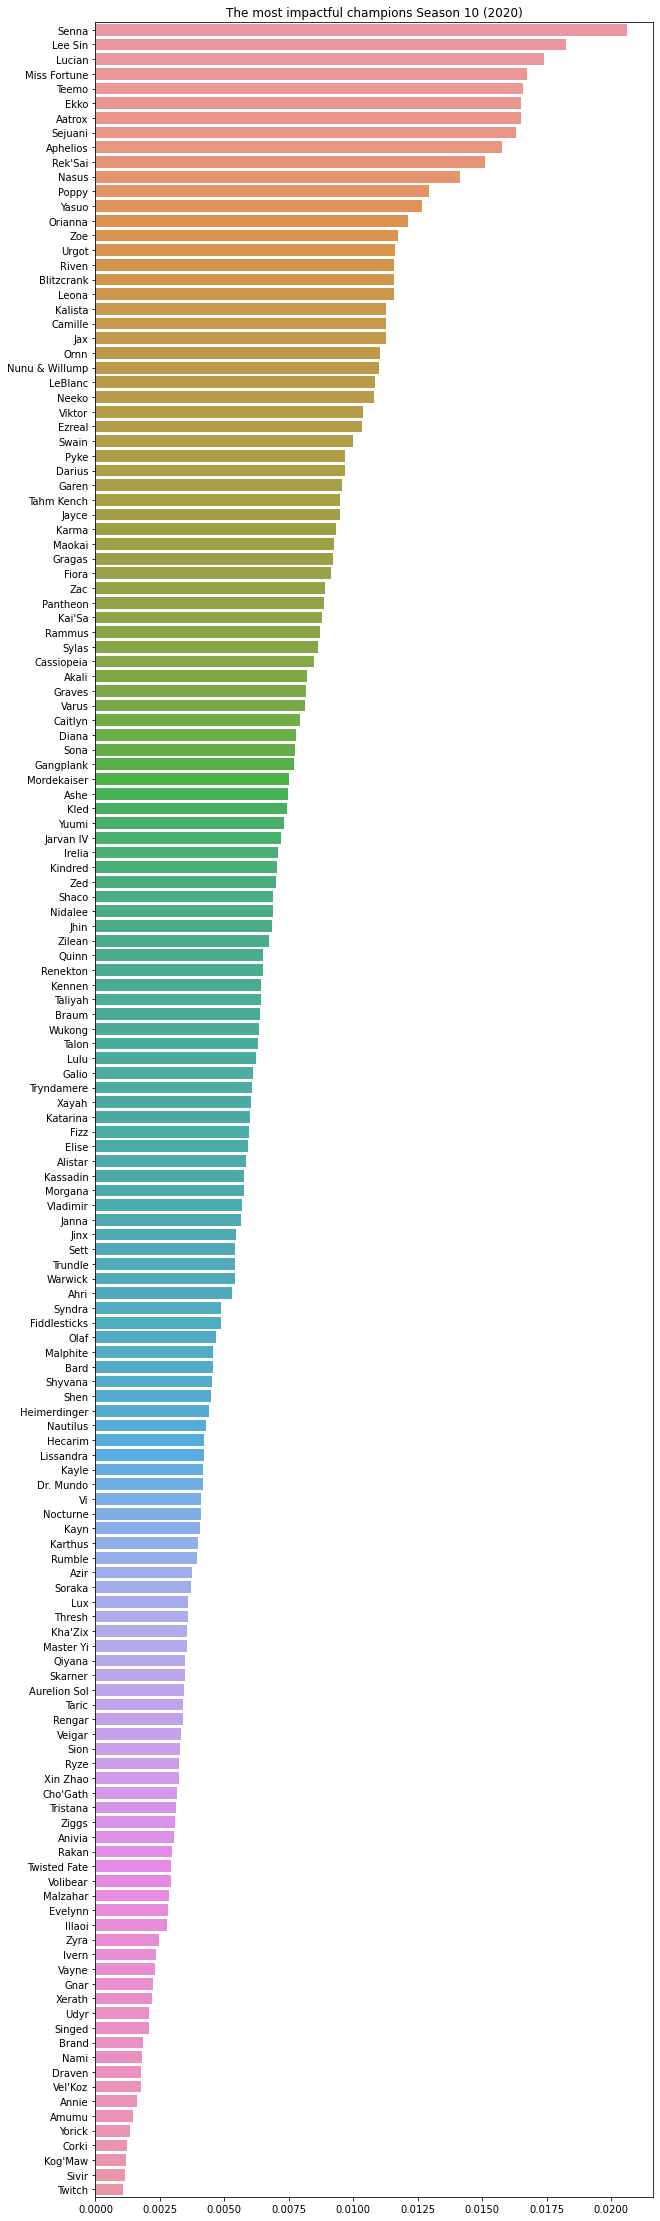

In [20]:
#feature importance
feature_score = pd.Series(ranFor.feature_importances_, index = namel).sort_values(ascending = False)

fig_dims = (10, 40)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(x = feature_score, y = feature_score.index, ax = ax)
ax.set_title("The most impactful champions Season 10 (2020)")

In [21]:
#classification report
print(classification_report(lb_test, rfPred))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52     46482
           1       0.51      0.51      0.51     46372

    accuracy                           0.51     92854
   macro avg       0.51      0.51      0.51     92854
weighted avg       0.51      0.51      0.51     92854



In [22]:
#LOGISTIC REGRESSION

logReg = LogisticRegression(solver = "liblinear")
logReg.fit(ft_train, lb_train.values.ravel())
lrPred = logReg.predict(ft_test)

LogisticRegressionAcc = metrics.accuracy_score(lb_test, rfPred)
LogisticRegressionAcc

0.5137635427660628

Text(0.5, 257.44, 'Predicted label')

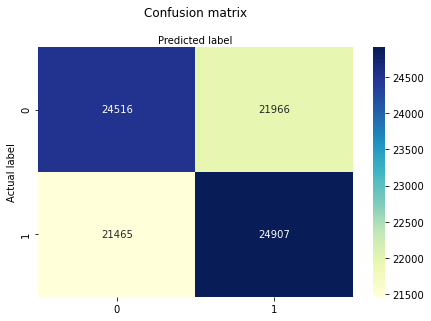

In [23]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(lb_test, lrPred)
cnf_matrix

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
#classification report
print(classification_report(lb_test, lrPred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53     46482
           1       0.53      0.54      0.53     46372

    accuracy                           0.53     92854
   macro avg       0.53      0.53      0.53     92854
weighted avg       0.53      0.53      0.53     92854



In [25]:
#SUPPORT VECTOR MACHINE
#create a smaller training set for SVM
ft_trainX, ft_testX, lb_trainX, lb_testX = train_test_split(feature, label, test_size = 0.9, random_state = 42)

svm = svm.SVC(kernel = "linear")
svm.fit(ft_trainX, lb_trainX.values.ravel())
svmPred = svm.predict(ft_testX)

SupportVectorMachineAcc = metrics.accuracy_score(lb_testX, svmPred)
SupportVectorMachineAcc

0.524297287271596

In [26]:
#classification report
print(classification_report(lb_testX, svmPred))

              precision    recall  f1-score   support

           0       0.53      0.49      0.51     83668
           1       0.52      0.56      0.54     83470

    accuracy                           0.52    167138
   macro avg       0.52      0.52      0.52    167138
weighted avg       0.52      0.52      0.52    167138



In [27]:
#Naive Bayes

nb = GaussianNB()
nb.fit(ft_train, lb_train.values.ravel())
nbPred = nb.predict(ft_test)

NaiveBayesAcc = metrics.accuracy_score(lb_test, nbPred)
NaiveBayesAcc

0.5232946345876321

In [28]:
#classification report
print(classification_report(lb_test, nbPred))

              precision    recall  f1-score   support

           0       0.53      0.38      0.44     46482
           1       0.52      0.67      0.58     46372

    accuracy                           0.52     92854
   macro avg       0.53      0.52      0.51     92854
weighted avg       0.53      0.52      0.51     92854



Text(0.5, 1.0, 'Elbow Method')

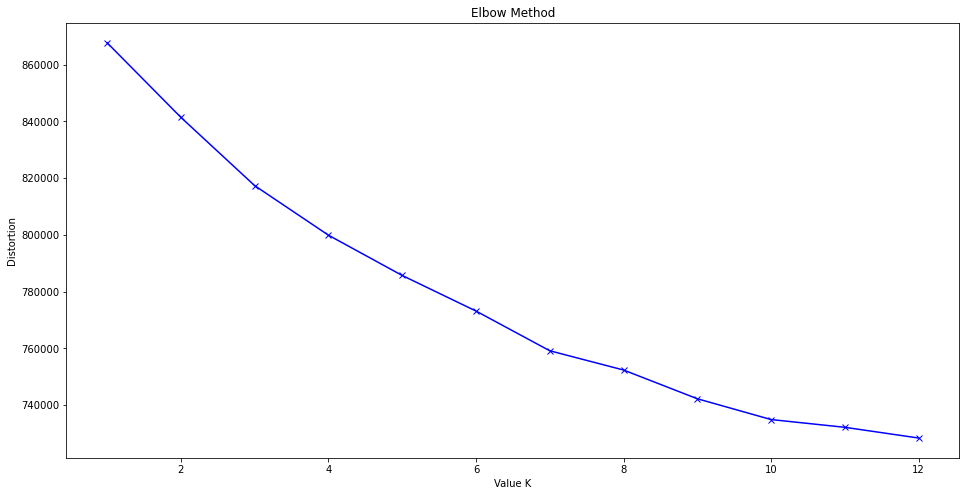

In [29]:
#KNN

#find the k with elbow method
kmeanDF = o2oh

dist = []
K = range(1, 13)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(kmeanDF)
    dist.append(kmeanModel.inertia_)

plt.figure(figsize = (16, 8))
plt.plot(K, dist, "bx-")
plt.xlabel("Value K")
plt.ylabel("Distortion")
plt.title("Elbow Method")

In [30]:
#fitting with K

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(ft_train, lb_train.values.ravel())
knnPred = knn.predict(ft_test)

KNearestNeighborsAcc = metrics.accuracy_score(lb_test, knnPred)
KNearestNeighborsAcc

0.5050401705903892

In [31]:
#classification report
print(classification_report(lb_test, knnPred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50     46482
           1       0.50      0.51      0.51     46372

    accuracy                           0.51     92854
   macro avg       0.51      0.51      0.51     92854
weighted avg       0.51      0.51      0.51     92854



In [32]:
#Overview of the 5 ML techniques

RF = "{:.2f}".format(RandomForestAcc*100)+"%"
LR = "{:.2f}".format(LogisticRegressionAcc*100)+"%"
SVM = "{:.2f}".format(SupportVectorMachineAcc*100)+"%"
NB = "{:.2f}".format(NaiveBayesAcc*100)+"%"
KNN = "{:.2f}".format(KNearestNeighborsAcc*100)+"%"

print(RF, LR, SVM, NB, KNN)

51.38% 51.38% 52.43% 52.33% 50.50%
